In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [2]:
import pandas as pd
data =pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [5]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [6]:
df_spam=data[data['v1']=='spam']
df_spam.shape

(747, 5)

In [7]:
df_ham=data[data['v1']=='ham']
df_ham.shape

(4825, 5)

In [8]:
df_ham_downsampled=df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 5)

In [9]:
df_balanced=pd.concat([df_spam,df_ham_downsampled])
df_balanced.shape

(1494, 5)

In [10]:
df_balanced

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
...,...,...,...,...,...
2413,ham,Lol please do. Actually send a pic of yourself...,NaN,NaN,NaN
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN
3724,ham,Nothing spl..wat abt u and whr ru?,NaN,NaN,NaN
2483,ham,Mm have some kanji dont eat anything heavy ok,NaN,NaN,NaN


In [11]:
df_balanced['v1'].value_counts()

spam    747
ham     747
Name: v1, dtype: int64

In [12]:
df_balanced['spam']=df_balanced['v1'].apply(lambda x:1 if x=='spam' else 0)
df_balanced.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
3461,spam,Bloomberg -Message center +447797706009 Why wa...,NaN,NaN,NaN,1
4293,spam,Kit Strip - you have been billed 150p. Netcoll...,NaN,NaN,NaN,1
1125,spam,For taking part in our mobile survey yesterday...,NaN,NaN,NaN,1
3649,ham,"We are hoping to get away by 7, from Langport....",NaN,NaN,NaN,0
4662,ham,No. Yes please. Been swimming?,NaN,NaN,NaN,0
4457,ham,Die... I accidentally deleted e msg i suppose ...,NaN,NaN,NaN,0
5405,ham,So how many days since then?,NaN,NaN,NaN,0
3778,spam,"Claim a 200 shopping spree, just call 08717895...",NaN,NaN,NaN,1
1491,spam,Your account has been credited with 500 FREE T...,NaN,NaN,NaN,1
1836,ham,Are you wet right now?,NaN,NaN,NaN,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['v2'],df_balanced['spam'], stratify=df_balanced['spam'])

In [14]:
X_train.head(4)

4541    FreeMsg Hi baby wow just got a new cam moby. W...
839     Last chance 2 claim ur å£150 worth of discount...
122     Todays Voda numbers ending 7548 are selected t...
4594                       Yo sorry was in the shower sup
Name: v2, dtype: object

In [15]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [16]:
# def get_sentence_embedding(sentence):
#     preprocessed_text=preprocess_url(sentence)
#     return encoder_url(preprocessed_text)['pooled_output']
            




In [17]:
# get_sentence_embedding(["500 $ will come","i want to go home"])

In [18]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.843517  , -0.5132726 , -0.8884572 , ..., -0.74748856,
        -0.7531473 ,  0.91964483],
       [-0.8720835 , -0.50543964, -0.94446677, ..., -0.8584752 ,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

In [19]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[4]])

array([[0.893363]], dtype=float32)

In [21]:
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [22]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [24]:
METRICS=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [26]:
model.fit(X_train,y_train,epochs=3)

Epoch 1/3
35/35 [==============================] - 246s 7s/step - loss: 0.6316 - accuracy: 0.6348 - precision: 0.6375 - recall: 0.6250
Epoch 2/3
35/35 [==============================] - 246s 7s/step - loss: 0.5016 - accuracy: 0.8259 - precision: 0.8078 - recall: 0.8554
Epoch 3/3
35/35 [==============================] - 251s 7s/step - loss: 0.4326 - accuracy: 0.8518 - precision: 0.8505 - recall: 0.8536


In [27]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 76s 6s/step - loss: 0.4098 - accuracy: 0.8850 - precision: 0.8529 - recall: 0.9305


[0.40977469086647034,
 0.885026752948761,
 0.8529411554336548,
 0.9304812550544739]

In [28]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 76s 6s/step


In [29]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[157,  30],
       [ 13, 174]], dtype=int64)

Text(33.0, 0.5, 'Truth')

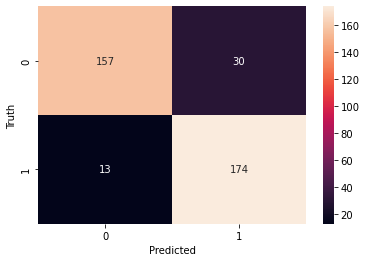

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       187
           1       0.85      0.93      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.88       374
weighted avg       0.89      0.89      0.88       374



In [34]:
df_balanced

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,spam
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,1
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,1
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,1
...,...,...,...,...,...,...
2413,ham,Lol please do. Actually send a pic of yourself...,NaN,NaN,NaN,0
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN,0
3724,ham,Nothing spl..wat abt u and whr ru?,NaN,NaN,NaN,0
2483,ham,Mm have some kanji dont eat anything heavy ok,NaN,NaN,NaN,0


In [35]:
model.save('saved_models/1/')

INFO:tensorflow:Assets written to: saved_models/1/assets


INFO:tensorflow:Assets written to: saved_models/1/assets


In [36]:
model.save('saved_models/2/')

INFO:tensorflow:Assets written to: saved_models/2/assets


INFO:tensorflow:Assets written to: saved_models/2/assets


In [37]:
model.save('saved_models/3/')

INFO:tensorflow:Assets written to: saved_models/3/assets


INFO:tensorflow:Assets written to: saved_models/3/assets
